# Multivariate Exploratory Data Analysis
## Lesson Overview
Welcome to lesson three! Today, we will dive into creating, describing, and visualizing multivariate data relationships by using the Matplotlib, Pandas, and Seaborn libraries in Python.

By the end of this lesson you will be able to:
* Calculate the correlation coefficient 
* Construct a contingency table
* Practice importing dataframes
* Build plots to describe multiple variables within a single dataset

Let's begin by importing our penguins dataset!

In [2]:
# Import pandas as pd
import pandas as pd

# Store penguins_wrangled.csv as penguins
penguins = pd.read_csv("penguins_wrangled.csv")

Now, we can look at the first few rows by typing dataframe.head(), or the last few rows by typing dataframe.tail()

In [3]:
penguins.head()

,Unnamed: 0,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,0,PAL0708,1,Adelie,Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,11/11/07,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
1,1,PAL0708,2,Adelie,Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,11/11/07,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN
2,2,PAL0708,3,Adelie,Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,11/16/07,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN
3,4,PAL0708,5,Adelie,Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,11/16/07,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,NaN
4,5,PAL0708,6,Adelie,Anvers,Torgersen,"Adult, 1 Egg Stage",N3A2,Yes,11/16/07,39.3,20.6,190.0,3650.0,MALE,8.66496,-25.29805,NaN


<div class="alert alert-block alert-danger">
Avoid doing: print( dataframe.head() ) or print( dataframe.tail() ) since it will mess up the format!
</div>

## Correlation Coefficient 

To calculate correlation we will make use of the *corr( ) function*.

**Structure:**
* corr_coef = dataframe.corr()

**Meanings of outputs**:
* 1: Full correlation. If one variable increases, so does the other
* 0: No correlation.
* -1: Full negative correlation. If one variable increases, the other decreases.

In [4]:
# Store penguins.corr() inside penguins_corr
penguins_corr = penguins.corr()

# Print result
print(penguins_corr)

                     Unnamed: 0  Sample Number  Culmen Length (mm)  \
Unnamed: 0             1.000000       0.137114            0.703662   
Sample Number          0.137114       1.000000           -0.264023   
Culmen Length (mm)     0.703662      -0.264023            1.000000   
Culmen Depth (mm)     -0.691711      -0.009061           -0.228626   
Flipper Length (mm)    0.831031       0.019753            0.653096   
Body Mass (g)          0.692066      -0.025134            0.589451   
Delta 15 N (o/oo)     -0.371663       0.013260           -0.056942   
Delta 13 C (o/oo)     -0.254498      -0.486510            0.196765   

                     Culmen Depth (mm)  Flipper Length (mm)  Body Mass (g)  \
Unnamed: 0                   -0.691711             0.831031       0.692066   
Sample Number                -0.009061             0.019753      -0.025134   
Culmen Length (mm)           -0.228626             0.653096       0.589451   
Culmen Depth (mm)             1.000000            -0.5777

<div class="alert alert-block alert-warning">This table is quite confusing to look at since it is showing us the correlation coefficient between <b>ALL</b> variables. </div>

If we want to look at two specific variables, we can use the same correlation table and indicate our variables by using loc.

**Structure:**
*  corr_coef = dataframe.loc["variable_one", "variable_two"]

In [5]:
# Store the correlation between Culmen Length and Culmen Depth inside culmen_corr
culmen_corr = penguins_corr.loc["Culmen Length (mm)", "Culmen Depth (mm)"]

# Print result 
print(culmen_corr)

-0.22862563591303017


## Contingency Table
To create a contingency table we can use *pd.crosstab( )*

**Structure:**
* pd.crosstab(dataframe["columnName1"], dataframe["columnName2"], margins = True)

**Arguments** :
* dataframe["columnName1"] ; first variable 
* dataframe["columnName2"] ; second variable
* margins = True ; this will calculate the total for each row/column

In [6]:
# Create cont_table with "Species" and "Island" from penguins dataframe.
cont_table = pd.crosstab(penguins["Species"], penguins["Island"], margins = True)

# Display the table
print(cont_table)

Island     Biscoe  Dream  Torgersen  All
Species                                 
Adelie         44     55         47  146
Chinstrap       0     68          0   68
Gentoo        119      0          0  119
All           163    123         47  333


If we want to see a table of proportions we can add one extra argument: normalize = True.

**Arguments** :
* dataframe["columnName1"] ; first variable 
* dataframe["columnName2"] ; second variable
* margins = True ; this will calculate the total for each row/column
* normalize = True ; this will calculate proportions instead of coutns

In [7]:
# Create prop_cont_table with "Species" and "Island" from penguins dataframe.
prop_cont_table = pd.crosstab(penguins["Species"], penguins["Island"], margins = True, normalize = True)

# Display the table
print(prop_cont_table)

Island       Biscoe     Dream  Torgersen       All
Species                                           
Adelie     0.132132  0.165165   0.141141  0.438438
Chinstrap  0.000000  0.204204   0.000000  0.204204
Gentoo     0.357357  0.000000   0.000000  0.357357
All        0.489489  0.369369   0.141141  1.000000


In [8]:
# We can also add to_markdown() at the end for visualization
prop_cont_table = prop_cont_table.to_markdown()
print(prop_cont_table)

| Species   |   Biscoe |    Dream |   Torgersen |      All |
|:----------|---------:|---------:|------------:|---------:|
| Adelie    | 0.132132 | 0.165165 |    0.141141 | 0.438438 |
| Chinstrap | 0        | 0.204204 |    0        | 0.204204 |
| Gentoo    | 0.357357 | 0        |    0        | 0.357357 |
| All       | 0.489489 | 0.369369 |    0.141141 | 1        |


## Multivariate Data Visualization

Now that we understand how Python can help us numerically analyze our multivariate data, let's see what Python's plotting tools can do to help visualize our data! Using the Matplotlib and Seaborn libraries for plot making, and the pandas library for importing data, we will learn how to create scatter plots, bar plots, linear model plots, and box plots to describe the relationships between variables in our dataset. 
  
Note that one code chunk produces only one plot. So all of the work you do in a chunk will only affect a single graph. Now, let's begin!

### Bar plot
Bar plots are a helpful data visualization that statisticians use to compare the values of various groups. Bar plots can be both vertical and horizontal, and they offer a relationship between a categorical and a continuous variable. Let's practice making them!

We will be using catplot from seaborn to create a barplot. A catplot shows the relationship between a numerical and one or more categorical variables using one of several visual representations. A really cool feature about catplot is that it can do counts for each variable for us! In other cases, we would have to perform data cleaning or create a sub-dataframe, however, if you want to learn how to do that look at our extra material!

**Structure:**
* sns.catplot(data = dataframe, x = "var_one", kind = "count")

**Arguments**: 
* data = dataframe
* x = get the counts from each category of this variable
* kind = the kind of graph we are creating; in this case, "count"

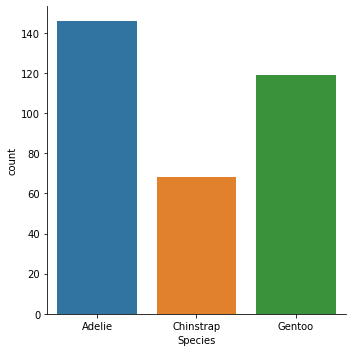

In [76]:
# Create catplot that shows the counts for each species from penguins dataframe
sns.catplot(data = penguins, x = "Species", kind = "count")

# Show plot
plt.show()

Now, what if we want to see how the **counts change by also adding island**? We can do so by introducing a new argument into catplot: hue. Hue will make a distinction (by colors) for each level of the categorical variable we're adding.

**Arguments**: 
* data = dataframe
* x = get the counts from each category of this variable
* hue = assigns a unique color to each category from this variable

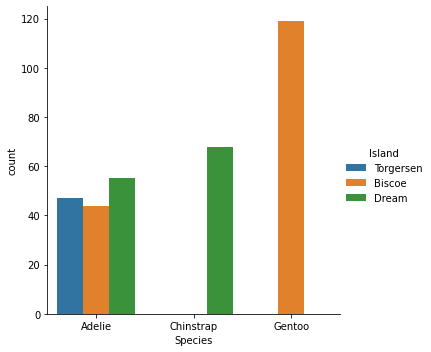

In [75]:
# Create catplot that shows the counts for each species AND color by island from penguins dataframe.
sns.catplot(data = penguins, x = "Species", hue = "Island", kind = "count")

# Show plot
plt.show()

Interesting, right? It looks like Chinstrap and Gentoo penguins only exist in one island. Now, what if we also want to see how the data changes **by sex**? 

In order to do this, we will use continue using *catplot( )* but we will add a new argument: col.

**Structure:**
* sns.catplot(data = dataframe, x = "var_one", hue = "var_two", col = "var_three", kind = "count")

**Arguments:**: 
* data = dataframe
* x = Count of each response to this categorical variable
* hue = assigns a unique color to each category from this variable
* col = Create as many graphs as categories from this variable
* kind = kind of visualization we're using, for now we will only use "count"

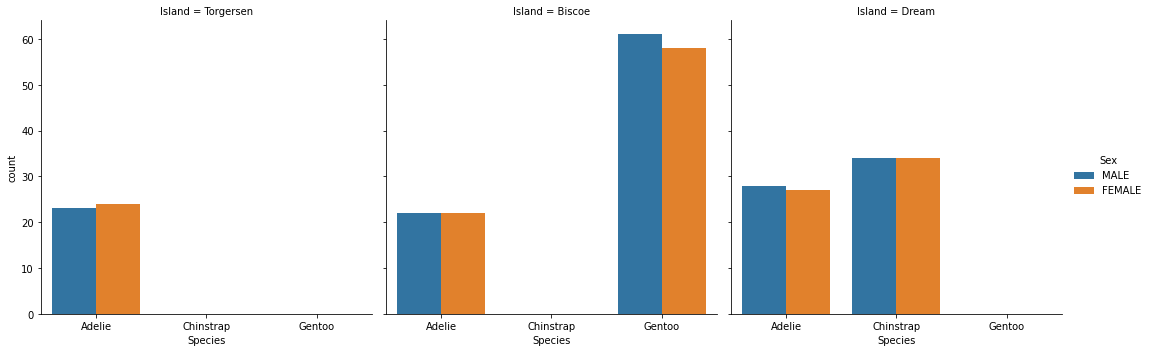

In [78]:
# Create three catplots (one for each island)
# Shows the counts for each species and color by sex
sns.catplot(data = penguins, x = "Species", hue = "Sex", col = "Island", kind = "count")

# Show plot
plt.show()

### Histogram plot

Histograms are a common way to visualize the distribution of a single numeric variable. Furthermore, it shows the probability distribution of a continuous variable, so we will certainly need to use these in our statistical analysis. Let's see how to make histograms using the histplot( ) method from seaborn.

**Structure:**
* sns.histplot(data = dataframe, x = "var_one", bins = "auto")

**Arguments:**
* data = dataframe
* x = "columnName" ; quantitative variable to display
* bins = "auto" ; will choose the best bin edges for us

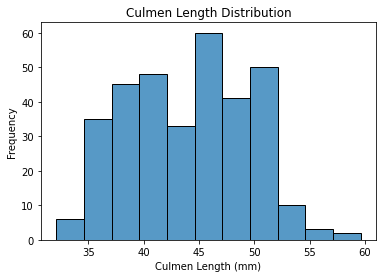

In [79]:
# Create histogram for Culmen Length (mm)
sns.histplot(data = penguins, x = "Culmen Length (mm)", bins = "auto")

# Label axis
plt.xlabel("Culmen Length (mm)")
plt.ylabel("Frequency")

# Add title
plt.title("Culmen Length Distribution")

# Display the graph
plt.show()

Now, what if on top of that we want to see how the data changes by **Island**? 

We would have to use a new method called FacetGrid, which is made for multiple plots visualization. The parameters for this method are:

**Structure:**
* g = sns.FacetGrid(data = dataframe, col = "var_one", hue = "var_two", palette = "color")

**Arguments:**
* data = dataframe
* col = "columnName" ; creates as many grids as categories from this variable
* hue = "columnName" ; assigns a unique color to each category from this variable
* palette = "paletteName" ; colors

After that, we would use another method (map) on our faceted graph, which will actually map the histograms in each one of the grids.

**Structure:**
* g.map(sns.histplot, "var_three")

**Arguments:**
* sns.nameOfPlot ; the type of sns plot we are creating, in this case sns.histplot
* "nameOfColumn" ; quantitative variable we are plotting from dataframe

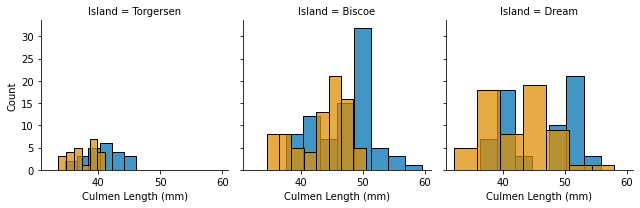

In [82]:
# Create one grid for each island and separate by sex within each grid.
g = sns.FacetGrid(data = penguins, col = "Island", hue = "Sex", palette = "colorblind")

# Map the histograms for Culmen Length (mm) into each grid
g.map(sns.histplot, "Culmen Length (mm)")

# Display the plot
plt.show()

A lot to digest! But play around with other dataframes from our repo and you will get used to the arguments and functions! 

## Density plot

Density plots will help us visualize how quantitative variables are distributed. In order to graph this, we will use sns.displot. First, we will visualize the density plot for culmen depth.

**Structure:**
* sns.displot(data = dataframe, x = "var_one", kind = "kde")

**Arguments:**
* data = dataframe
* x = "columnName" ; quantitative variable to display
* kind = "graphName" ; the type of graph we're using, for our purposes "kde" (short for kernel distribution estimate)

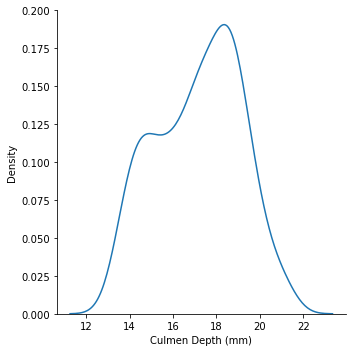

In [19]:
# Create displot for Culmen Depth (mm)
sns.displot(data = penguins, x = "Culmen Depth (mm)", kind="kde")

# Display the plot
plt.show()

Now, what if we want to see how the distribution changes **by specie**? We would have to add the hue parameter once again.

**Structure:**
* sns.displot(data = dataframe, x = "var_one", hue = "var_two", kind = "kde", palette = "colors")

**Arguments:**
* data = dataframe
* x = "columnName" ; quantitative variable to display
* hue = "columnName" ; assigns a unique color to each category from this variable 
* kind = "graphName" ; the type of graph we're using, for our purposes "kde" (short for kernel distribution estimate)
* palette = "paletteName" ; colors

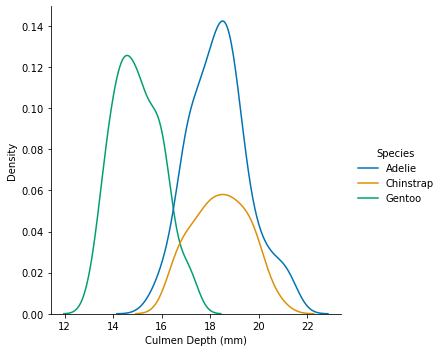

In [20]:
# Create displot for Culmen Depth (mm) and separate them by specie
sns.displot(penguins, x = "Culmen Depth (mm)", hue = "Species", kind="kde", palette = "colorblind")

# Display the plot
plt.show()

Lastly, if we also want to visualize a third variable, we can create a plot for each category. In order to do so, we will use FacetGrid again.

**Structure:**
* g = sns.FacetGrid(data = dataframe, col = "var_one", hue = "var_two", palette = "color")

**Arguments:**
* data = dataframe
* col = "columnName" ; creates as many grids as categories from this variable
* hue = "columnName" ; assigns a unique color to each category from this variable
* palette = "paletteName" ; colors

After that, we would use another method (map) on our faceted graph, which will actually map the density plos in each one of the grids.

**Structure:**
* g.map(sns.kdeplot, "var_three")

**Arguments:**
* sns.nameOfPlot ; the type of sns plot we are creating, in this case sns.kdeplot
* "nameOfColumn" ; quantitative variable we are plotting from dataframe

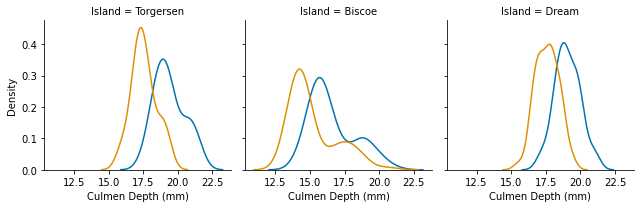

In [83]:
# Create one grid for each island, color by sex within each grid
g = sns.FacetGrid(data = penguins, col = "Island", hue = "Sex", palette = "colorblind")

# Map the density plots into each one of the grids
g.map(sns.kdeplot, "Culmen Depth (mm)")

# Display the plot
plt.show()

### lm plots
The lm plot displays the scattered data and fits a regression model onto it. It is exactly the same as putting the line of best fit onto our graph, and this process helps to understand the relationship between two variables. The method lmplot( ) takes the input of two column names (x and y) as a string and a DataFrame variable, and by default, fits the regression line. Let's try it out!

**Structure:**
* sns.lmplot(data = dataframe, x = "var_one", y = "var_two")

**Parameters**: 
* data = dataframe
* x = "columnName"; quantitative variable of choice
* y = "columnName"; quantitative variable of choice

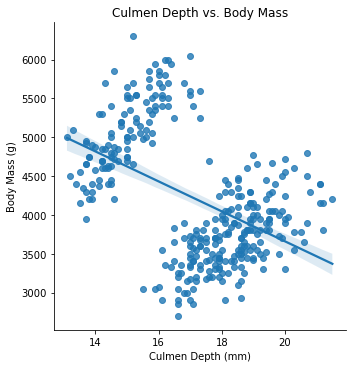

In [23]:
# Plot the association Culmen Depth (mm) and Body Mass (g)
sns.lmplot(data = penguins, x = "Culmen Depth (mm)", y = "Body Mass (g)")

# Add a title
plt.title("Culmen Depth vs. Body Mass")

# Display the plot
plt.show()

### Scatter plot
To create a scatter plot, we can simply remove the line of best fit from lm_plot. We can do so by setting the argument fig_reg to False within the lmplot( ) method.

**Structure:**
* sns.lmplot(data = dataframe, x = "var_one", y = "var_two", fit_reg = False)

**Parameters**: 
* data = dataframe
* x = "columnName"; quantitative variable of choice
* y = "columnName"; quantitative variable of choice
* fit_reg = False; to get rid of the line of best fit

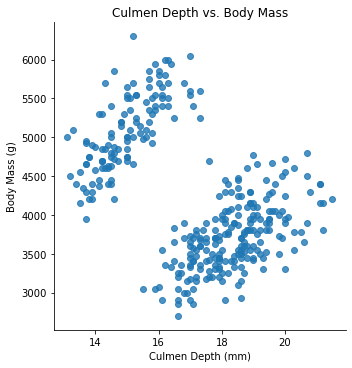

In [84]:
# Plot the association Culmen Depth (mm) and Body Mass (g) and get rid of the line of best fit
sns.lmplot(data = penguins, x = "Culmen Depth (mm)", y = "Body Mass (g)", fit_reg = False)

# Add a title
plt.title("Culmen Depth vs. Body Mass")

# Display the plot
plt.show()

Huh, doesn't the above scatterplot look interesting? There are two clusters of data, which might hint that something else is going on in our data. One would assume that there would be a strong, positive association between body mass and culmen depth in penguins, but here we see the opposite. This could be a result of the differences in penguin species, so let's go ahead and add it as another dimension to our plot!

**Structure:**
* sns.lmplot(data = dataframe, x = "var_one", y = "var_two", hue = "var_thre", fit_reg = False)

**Parameters**: 
* data = dataframe
* x = "columnName"; quantitative variable of choice
* y = "columnName"; quantitative variable of choice
* hue = "columnName"; color by each category from this variable
* fit_reg = False; to get rid of the line of best fit

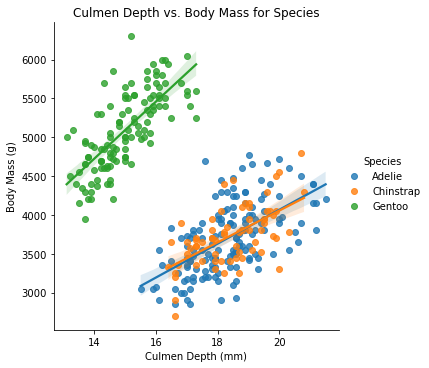

In [25]:
# Plot the association Culmen Depth (mm) and Body Mass (g) and color by specie 
sns.lmplot(x = "Culmen Depth (mm)", y = "Body Mass (g)", hue = "Species", data = penguins)

# Add a title
plt.title("Culmen Depth vs. Body Mass for Species")

# Display the plot
plt.show()

### Box plot
Box plots, or box-and-whisker plots, are another helpful visualization to understand the distribution of our data. Let's practice making a box plot in Seaborn using the same dataset from our previous example!

**Structure:**
* sns.boxplot(data = dataframe, x = "var_one", y = "var_two")

**Parameters**: 
* data = dataframe
* x = "columnName"; categorical variable of choice
* y = "columnName"; quantitative variable of choice

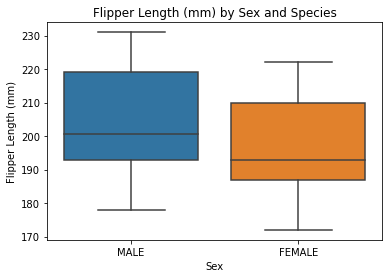

In [26]:
# Create a box plot for the variables 'Body Mass (g)' and 'Sex'
sns.boxplot(data = penguins, x = "Sex", y = "Flipper Length (mm)")

# Add a title
plt.title("Flipper Length (mm) by Sex and Species")

# Display the plot
plt.show()

What if we wanted to learn more about how flipper length varies by sex AND by species? We can add the 'Species' variable to our box plot by adding color, using the hue parameter within sns.boxplot( ). Let's try it out!

**Structure:**
* sns.boxplot(data = dataframe, x = "var_one", y = "var_two", hue = "var_three")

**Parameters**: 
* data = dataframe
* x = "columnName"; categorical variable of choice
* y = "columnName"; quantitative variable of choice
* hue = "columnName"; color by each category from this variable

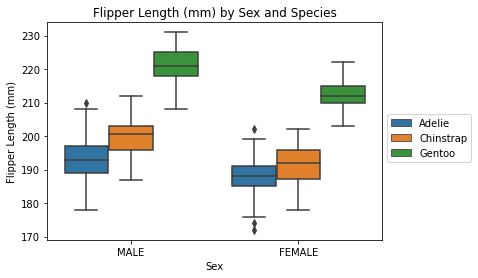

In [85]:

# Create a box plot for the variables Body Mass (g) and Sex and color by Specie
sns.boxplot(data = penguins, x = "Sex", y = "Flipper Length (mm)", hue = "Species")

# Edits legend so that it does not block the box drawings
plt.legend(bbox_to_anchor = (1, 0.6))

# Add a title
plt.title("Flipper Length (mm) by Sex and Species")

# Display the plot
plt.show()

## Tips

As you practice the skills learned in this section, please keep in mind the following suggestions:

+ Always remember to load the necessary libraries.
+ Name your variables, dataframes, and labels helpful and informative titles.
+ Remember that Python is case-sensitive, so save yourself the trouble and type carefully. 
+ Don't lose hope if you encounter a warning. Troubleshooting warnings are a great way to learn.
+ If you get stuck, use the help documentation that you learned in our first lecture to help you troubleshoot!
+ If you want extra material on univariate exploratory data analysis, check out the extra material posted on our repo!

## References
Main resources that we used to build this material:

1. Navlani, Avinash, Armando Fandango, and Ivan Idris. 2021. Python Data Analysis. Third Edition. Birmingham: Packt Publishing.

2. Python Data Analysis - Third Edition. (2019). Jupyter Notebook. Packt. https://github.com/PacktPublishing/Python-Data-Analysis-Third-Edition/blob/e1cd8029a1830fe5ecc86379ab361d215e71f036/Chapter05/HR_comma_sep.csv. Accessed July 7, 2022.

3. Pandas documentation: https://pandas.pydata.org/docs/

4. Seaborn documentation: https://seaborn.pydata.org/tutorial.html 

5. Stackoverflow: https://stackoverflow.com

6. Geekforgeeks: https://www.geeksforgeeks.org 

7. Pythongraphgallery: https://www.python-graph-gallery.com

8. Matplotlib documentation: https://matplotlib.org/stable/tutorials/index

